<a href="https://colab.research.google.com/github/map72ru/python_data_lib/blob/main/MihailovAP_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Курсовой проект

## Постановка задачи

### Задача

Требуется, на основании имеющихся данных о клиентах банка, построить модель, используя обучающий датасет, для прогнозирования невыполнения долговых обязательств по текущему кредиту. Выполнить прогноз для примеров из тестового датасета.

### Наименование файлов с данными

course_project_train.csv - обучающий датасет
course_project_test.csv - тестовый датасет

### Целевая переменная

Credit Default - факт невыполнения кредитных обязательств

### Метрика качества

F1-score (sklearn.metrics.f1_score)

### Требования к решению

*Целевая метрика*

F1 > 0.5
Метрика оценивается по качеству прогноза для главного класса (1 - просрочка по кредиту)

*Решение должно содержать*

1.   Тетрадка Jupyter Notebook с кодом Вашего решения, названная по образцу {ФИО}_solution.ipynb, пример SShirkin_solution.ipynb
2.   Файл CSV с прогнозами целевой переменной для тестового датасета, названный по образцу {ФИО}_predictions.csv, пример SShirkin_predictions.csv

*Рекомендации для файла с кодом (ipynb)*

1. Файл должен содержать заголовки и комментарии (markdown)
2. Повторяющиеся операции лучше оформлять в виде функций
3. Не делать вывод большого количества строк таблиц (5-10 достаточно)
4. По возможности добавлять графики, описывающие данные (около 3-5)
5. Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта
6. Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)
7. Весь проект должен быть в одном скрипте (файл ipynb).
8. Допускается применение библиотек Python и моделей машинного обучения, которые были в данном курсе.

### Сроки сдачи

Cдать проект нужно в течение 5 дней после окончания последнего вебинара. Оценки работ, сданных до дедлайна, будут представлены в виде рейтинга, ранжированного по заданной метрике качества. Проекты, сданные после дедлайна или сданные повторно, не попадают в рейтинг, но можно будет узнать результат.

## Примерное описание этапов выполнения курсового проекта

### Построение модели классификации

1. Обзор обучающего датасета
2. Обработка выбросов
3. Обработка пропусков
4. Анализ данных
5. Отбор признаков
6. Балансировка классов
7. Подбор моделей, получение бейзлана
8. Выбор наилучшей модели, настройка гиперпараметров
9. Проверка качества, борьба с переобучением
10. Интерпретация результатов

### Прогнозирование на тестовом датасете

1. Выполнить для тестового датасета те же этапы обработки и постронияния признаков
2. Спрогнозировать целевую переменную, используя модель, построенную на обучающем датасете
3. Прогнозы должны быть для всех примеров из тестового датасета (для всех строк)
Соблюдать исходный порядок примеров из тестового датасета

## Обзор данных

### Описание датасета

1.  **Home Ownership** - домовладение
2.  **Annual Income** - годовой доход
3.  **Years in current job** - количество лет на текущем месте работы
4.  **Tax Liens** - налоговые обременения
5.  **Number of Open Account**s - количество открытых счетов
6.  **Years of Credit History** - количество лет кредитной истории
7.  **Maximum Open Credit** - наибольший открытый кредит
8.  **Number of Credit Problems** - количество проблем с кредитом
9.  **Months since last delinquent** - количество месяцев с последней просрочки платежа
10.  **Bankruptcies** - банкротства
11.  **Purpose** - цель кредита
12.  **Term** - срок кредита
13.  **Current Loan Amount** - текущая сумма кредита
14.  **Current Credit Balance** - текущий кредитный баланс
15.  **Monthly Debt** - ежемесячный долг
16.  **Credit Score** - кредитный рейтинг
17.  **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

# Решение

#### Загрузка тренировочного и целевого датасета

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [90]:
import pandas as pn
import math
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (roc_auc_score, roc_curve, auc, confusion_matrix,
                            accuracy_score, classification_report, plot_confusion_matrix,
                            plot_precision_recall_curve, precision_recall_curve,
                            plot_roc_curve,f1_score, precision_score, recall_score, confusion_matrix)

In [3]:
train = pn.read_csv('//content/gdrive/My Drive/data/course_project_train.csv')
test = pn.read_csv('//content/gdrive/My Drive/data/course_project_test.csv')

#### Исследуем данные

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

Три категориальных признака: "Home Ownership", "Years in current job", "Purpose", "Term". Частично отсутствуют данные по следующим атрибутам "Annual Income", "Years in current job", "Months since last delinquent", "Credit Score".

In [6]:
train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


Рассмотрим категриальные признаки

In [8]:
train['Home Ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

In [9]:
test['Home Ownership'].value_counts()

Home Mortgage    1225
Rent             1020
Own Home          248
Have Mortgage       7
Name: Home Ownership, dtype: int64

Предположим, что значения "Home Mortgage" и "Have Mortgage" эквивалентны. Сделаем замену.

In [10]:
train.loc[train['Home Ownership'] == 'Have Mortgage', 'Home Ownership'] = 'Home Mortgage'
test.loc[test['Home Ownership'] == 'Have Mortgage', 'Home Ownership'] = 'Home Mortgage'

In [11]:
train['Years in current job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

Не зная природу данных сложно делать какие-то предположения. В данном случае, для атрибута 'Years in current job' отсутствие 371 значения может означать как пропуск данных, так и то, что эти люди не работают (т.е. новое значение категории). Примем, что данные отсутствуют. Распределим отсутствующие данные согласно весу значения категории в общем объеме имеющихся данных 

In [12]:
def distribute_values(values):
  isNan = values.isna().sum()
  size = values.value_counts().sum()

  keys = values.value_counts().keys().tolist()
  vals = values.value_counts().tolist()

  n = 0
  sums = 0
  for cat in keys:
    if n == (np.size(keys)-1):
      m = isNan - sums
    else:        
      m = math.floor(isNan * vals[n] / size)
      sums = sums + m

    values.fillna(cat, inplace=True, limit=m)       

    n = n+1



In [13]:
distribute_values(train['Years in current job'])
distribute_values(test['Years in current job'])

In [14]:
train['Years in current job'].value_counts()

10+ years    2453
2 years       741
3 years       652
< 1 year      592
5 years       542
1 year        530
4 years       493
6 years       448
7 years       416
8 years       356
9 years       277
Name: Years in current job, dtype: int64

In [15]:
test['Years in current job'].value_counts()

10+ years    838
3 years      236
2 years      219
< 1 year     214
5 years      175
1 year       158
4 years      157
7 years      144
6 years      141
8 years      110
9 years      108
Name: Years in current job, dtype: int64

Уменьшим количество категорий

In [16]:
def set_current_job_categories(df):
    # No 4
    # Уменьшаем кол-во групп 'Years in current job'
    year_mode = df['Years in current job'].mode().astype(str)[0]
    df['Years in current job'] = df['Years in current job'].fillna(year_mode)

#    Решение № 1 : разбить по группам
    df.loc[(df['Years in current job'] == '< 1 year') | (df['Years in current job'] == '1 year') ,  'Years in current job'] = '1 or less year' 
    df.loc [(df['Years in current job'] == '2 years') | (df['Years in current job'] == '3 years') | (df['Years in current job'] == '4 years'),  'Years in current job'] = '2-4 less years'
    df.loc[(df['Years in current job'] == '5 years') | (df['Years in current job'] == '6 years') | (df['Years in current job'] == '7 years'),  'Years in current job'] = '5-7 years'
    df.loc[(df['Years in current job'] == '8 years') | (df['Years in current job'] == '9 years') ,  'Years in current job'] = '8-9 years'
    
    return df

In [17]:
set_current_job_categories(train)
set_current_job_categories(test)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,2-4 less years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 or less year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,2-4 less years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,5-7 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Home Mortgage,1020053.0,10+ years,0.0,14.0,29.1,559152.0,1.0,68.0,1.0,debt consolidation,Short Term,99999999.0,162735.0,15046.0,745.0
2496,Home Mortgage,NaN,2-4 less years,0.0,15.0,17.0,1737780.0,0.0,77.0,0.0,debt consolidation,Short Term,468512.0,1439269.0,32996.0,NaN
2497,Home Mortgage,1171806.0,2-4 less years,0.0,48.0,12.8,1706430.0,0.0,NaN,0.0,debt consolidation,Short Term,430496.0,676438.0,36912.0,695.0
2498,Rent,723520.0,10+ years,0.0,14.0,28.8,945780.0,0.0,NaN,0.0,debt consolidation,Short Term,257774.0,391248.0,13506.0,744.0


Проверим правильность заполнения атрибута Term (Срок кредита). Считаем, что если срок редита более 25 лет, то это 'Long Term'

In [18]:
train['Term'].value_counts()

Short Term    5556
Long Term     1944
Name: Term, dtype: int64

In [19]:
train.loc[(train['Current Loan Amount'] > (train['Monthly Debt'] * 12 * 25)) & (train['Term'] != 'Long Term') & (train['Current Loan Amount'] != 99999999.0), 'Term'] = 'Short Term'
test.loc[(test['Current Loan Amount'] > (test['Monthly Debt'] * 12 * 25)) & (test['Term'] != 'Long Term') & (test['Current Loan Amount'] != 99999999.0), 'Term'] = 'Short Term'

In [20]:
train['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

Уменьшим количество категорий

In [21]:
def set_purpose(df):
    df.loc[df['Purpose'] == 'take a trip', 'Purpose'] = 'human'
    df.loc[df['Purpose'] == 'renewable energy', 'Purpose'] = 'business'
    df.loc[df['Purpose'] == 'small business', 'Purpose'] = 'business'
    df.loc[df['Purpose'] == 'educational expenses', 'Purpose'] = 'human'
    df.loc[df['Purpose'] == 'medical bills', 'Purpose'] = 'human'
    df.loc[df['Purpose'] == 'wedding', 'Purpose'] = 'human'
    # не знаю что это такое
    df.loc[df['Purpose'] == 'moving', 'Purpose'] = 'other' 
    
    return df

In [22]:
set_purpose(train)
set_purpose(test)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,2-4 less years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 or less year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,human,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,2-4 less years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,5-7 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Home Mortgage,1020053.0,10+ years,0.0,14.0,29.1,559152.0,1.0,68.0,1.0,debt consolidation,Short Term,99999999.0,162735.0,15046.0,745.0
2496,Home Mortgage,NaN,2-4 less years,0.0,15.0,17.0,1737780.0,0.0,77.0,0.0,debt consolidation,Short Term,468512.0,1439269.0,32996.0,NaN
2497,Home Mortgage,1171806.0,2-4 less years,0.0,48.0,12.8,1706430.0,0.0,NaN,0.0,debt consolidation,Short Term,430496.0,676438.0,36912.0,695.0
2498,Rent,723520.0,10+ years,0.0,14.0,28.8,945780.0,0.0,NaN,0.0,debt consolidation,Short Term,257774.0,391248.0,13506.0,744.0


Анализ параметра Annual Income (Годовой доход)

In [23]:
train['Annual Income'].describe()

count    5.943000e+03
mean     1.366392e+06
std      8.453392e+05
min      1.645970e+05
25%      8.443410e+05
50%      1.168386e+06
75%      1.640137e+06
max      1.014934e+07
Name: Annual Income, dtype: float64

In [24]:
# Функция считает межквантильное расстояние
def interquantile_distance(desc):
  return (desc['25%'] - 1.5 * (desc['75%'] - desc['25%']), desc['75%'] + 1.5 * (desc['75%'] - desc['25%']))

In [25]:
# Посмотрим на значения выбросов атрибута

train.loc[train['Annual Income'] > interquantile_distance(train['Annual Income'].describe())[1]].describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,2.870000e+02,287.000000,287.000000,287.000000,2.870000e+02,287.000000,151.000000,287.000000,2.870000e+02,2.870000e+02,287.000000,287.000000,287.000000
mean,3.986116e+06,0.118467,13.041812,21.540418,2.591063e+06,0.198606,29.456954,0.059233,1.713323e+07,6.614946e+05,37515.118467,993.885017,0.170732
std,1.379369e+06,0.663673,5.443768,6.938312,1.597565e+07,0.783750,21.656634,0.312854,3.720198e+07,7.904984e+05,21398.846739,1303.629910,0.376932
min,2.834325e+06,0.000000,3.000000,5.900000,0.000000e+00,0.000000,0.000000,0.000000,3.011800e+04,0.000000e+00,2227.000000,602.000000,0.000000
25%,3.061584e+06,0.000000,9.000000,16.450000,5.432460e+05,0.000000,13.000000,0.000000,3.406480e+05,2.106435e+05,22618.000000,709.000000,0.000000
50%,3.484429e+06,0.000000,13.000000,20.600000,9.160580e+05,0.000000,25.000000,0.000000,5.603400e+05,4.427380e+05,35417.000000,735.000000,0.000000
75%,4.279085e+06,0.000000,16.000000,25.450000,1.574507e+06,0.000000,40.000000,0.000000,7.700440e+05,7.658900e+05,47986.500000,744.000000,0.000000
max,1.014934e+07,7.000000,43.000000,45.200000,2.655129e+08,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7440.000000,1.000000


Рассчитаем среднюю отношение годового дохода к сумме кредита и по этому коэффициенту заполним недостающие данные

In [26]:
 coeff = train.loc[train['Annual Income'].isnull() == False, 'Annual Income'].mean() / train.loc[train['Current Loan Amount'] != 99999999.0, 'Current Loan Amount'].mean()

 train.loc[train['Annual Income'].isnull() == True, 'Annual Income'] = coeff * train['Current Loan Amount']
 test.loc[test['Annual Income'].isnull() == True, 'Annual Income'] = coeff * test['Current Loan Amount']

 train.loc[train['Annual Income'].isnull() == True]


,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default


Имеется 287 значений, которые можно принять за выбросы. Максимальное значение более чем в два раза превышает 75% квантиль и в 100 раз больше чем минимальное значение. Очень похоже на выброс.

In [27]:
train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,10+ years,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8-9 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,5-7 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8-9 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


Для null значений в атрибуте Bankruptcies (Банкротства) поставим значение 0 (Не банкрот)

In [28]:
train['Bankruptcies'] = train['Bankruptcies'].fillna(0)
test['Bankruptcies'] = test['Bankruptcies'].fillna(0)

Самый "тяжелый" случай - атрибут 'Months since last delinquent' (количество месяцев с последней просрочки платежа). Информации не достаточно. Пустые значения это не было просрочек? Поставим для тех, у кого не было банкронств значение 0, для остальных - среднее значение просрочки

In [29]:
def set_month_delinquent(df):
  mode = df.loc[df['Months since last delinquent'].isnull() == False, 'Months since last delinquent'].mode()
  print(mode)
  df.loc[(df['Bankruptcies'] == 0) & (df['Months since last delinquent'].isnull() == True), 'Months since last delinquent'] = 0
  df.loc[(df['Months since last delinquent'].isnull() == True), 'Months since last delinquent'] = mode
  return df


In [30]:
set_month_delinquent(train)
set_month_delinquent(test)


0    14.0
dtype: float64
0    16.0
dtype: float64


,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,7.183823e+05,2-4 less years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,2.318380e+05,1 or less year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,human,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1.152540e+06,2-4 less years,0.0,10.0,13.7,204600.0,0.0,0.0,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1.220313e+06,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2.340952e+06,5-7 years,0.0,11.0,23.6,1207272.0,0.0,0.0,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Home Mortgage,1.020053e+06,10+ years,0.0,14.0,29.1,559152.0,1.0,68.0,1.0,debt consolidation,Short Term,99999999.0,162735.0,15046.0,745.0
2496,Home Mortgage,2.071587e+06,2-4 less years,0.0,15.0,17.0,1737780.0,0.0,77.0,0.0,debt consolidation,Short Term,468512.0,1439269.0,32996.0,NaN
2497,Home Mortgage,1.171806e+06,2-4 less years,0.0,48.0,12.8,1706430.0,0.0,0.0,0.0,debt consolidation,Short Term,430496.0,676438.0,36912.0,695.0
2498,Rent,7.235200e+05,10+ years,0.0,14.0,28.8,945780.0,0.0,0.0,0.0,debt consolidation,Short Term,257774.0,391248.0,13506.0,744.0


In [31]:
# Так и не смог понять - не запонятеся 459 значений, хотя первоначально их 4561. Пробовал и fillna использовать, результат тот же, поэтому им ставлю принудительно среднее
train.loc[train['Months since last delinquent'].isnull() == True] = 14

In [32]:
test.loc[test['Months since last delinquent'].isnull() == True] = 16

Заполнение атрибута 'Credit Score'

In [33]:
def set_credit_score(df):   
    mean = df['Credit Score'].mean()
    df['Credit Score'] = df['Credit Score'].fillna(mean)

In [34]:
set_credit_score(train)
set_credit_score(test)

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 7500 non-null   float64
 2   Years in current job          7500 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  7500 non-null   float64
 9   Bankruptcies                  7500 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 2500 non-null   float64
 2   Years in current job          2500 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  2500 non-null   float64
 9   Bankruptcies                  2500 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

#### Обработка выбросов

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb792d62978>,
      dtype=object)

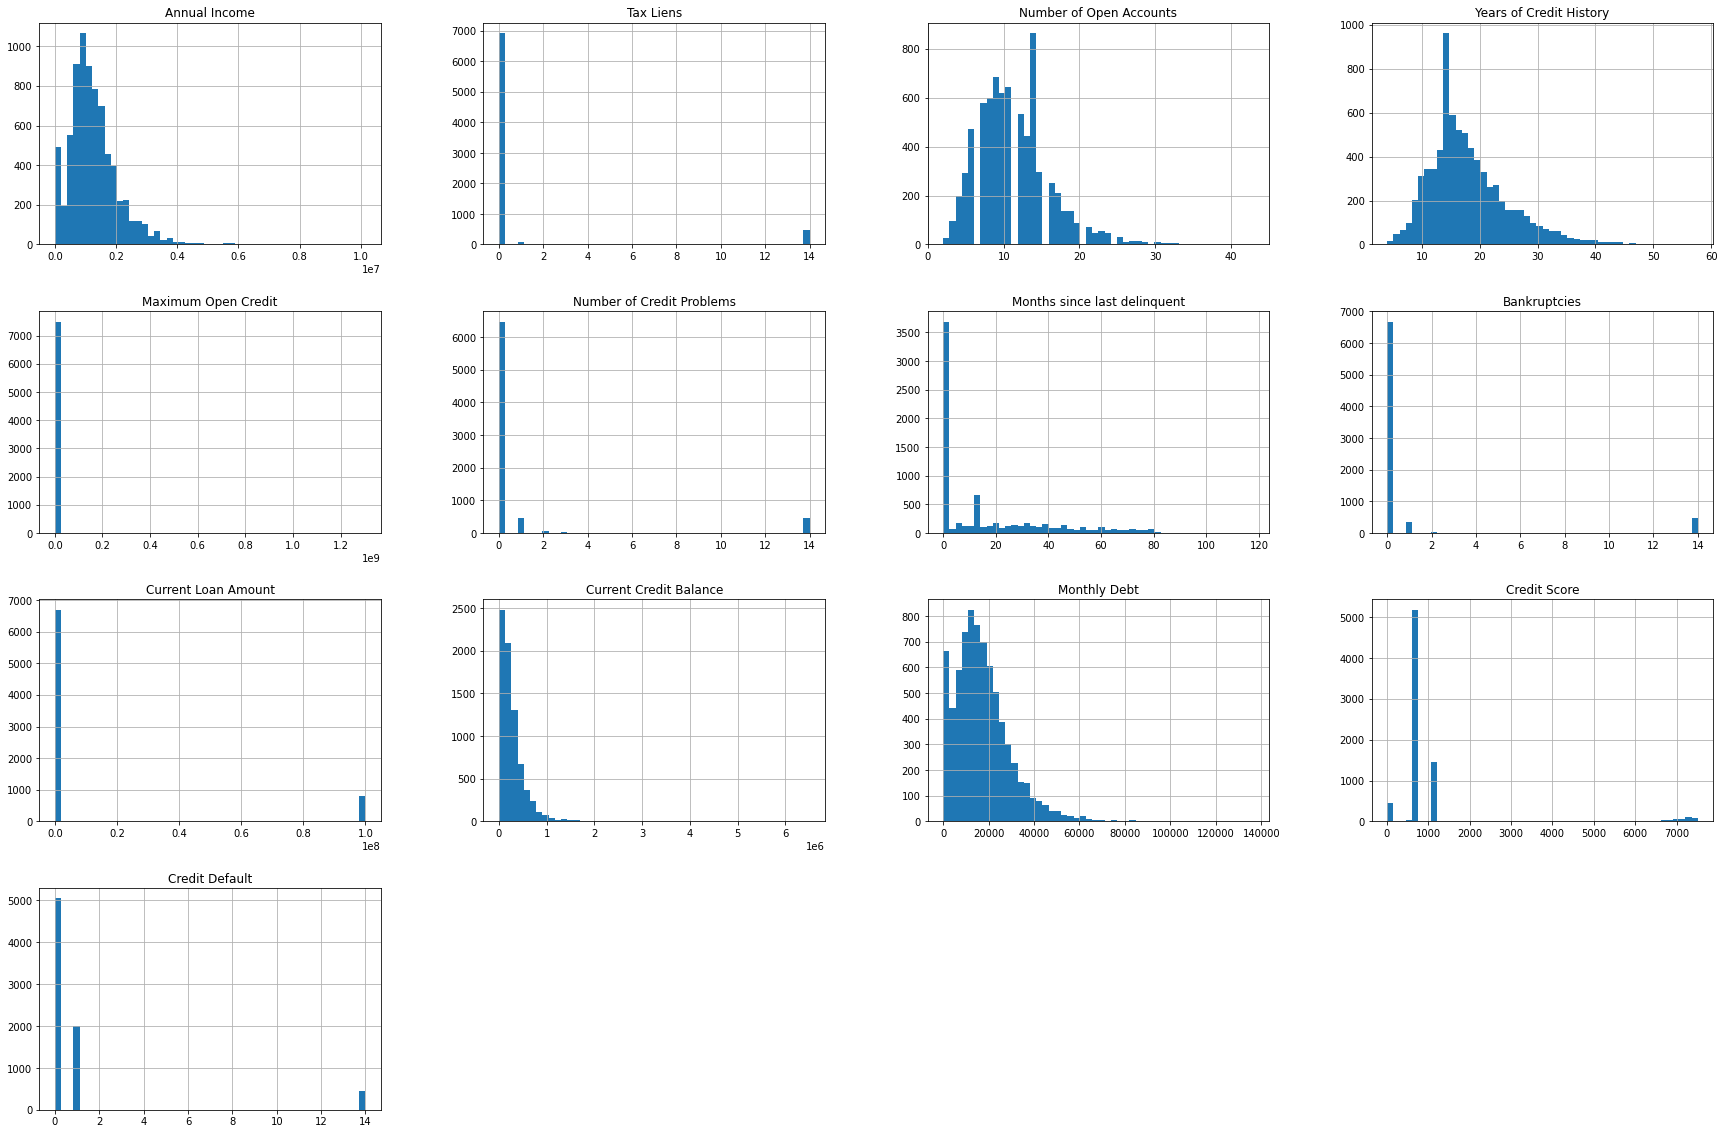

In [37]:
train.hist(bins=50, figsize=(30,20))

Уберем выбросы по открытым кредитам

In [38]:
def remove_ejection(df, attrib):
    sigma = df[attrib].std()
    mean = df[attrib].mean()
    df.loc[df[attrib] > (mean + 3 * sigma), attrib] = mean

In [39]:
remove_ejection(train, 'Maximum Open Credit')
remove_ejection(test, 'Maximum Open Credit')

remove_ejection(train, 'Annual Income')
remove_ejection(test, 'Annual Income')

remove_ejection(train, 'Years of Credit History')
remove_ejection(test, 'Years of Credit History')

In [40]:
remove_ejection(train, 'Years of Credit History')
remove_ejection(test, 'Years of Credit History')

In [41]:
remove_ejection(train, 'Monthly Debt')
remove_ejection(test, 'Monthly Debt')
# нулевые значения это странно. Заменим их на среднее
train.loc[train['Monthly Debt'] == 0, 'Monthly Debt'] = train['Monthly Debt'].mean()
test.loc[train['Monthly Debt'] == 0, 'Monthly Debt'] = test['Monthly Debt'].mean()

In [42]:
remove_ejection(train, 'Current Credit Balance')
remove_ejection(test, 'Current Credit Balance')

#### Добавим синтетические атрибуты

In [43]:
train['Real Annual Income'] = train['Annual Income'] * (1 - train['Tax Liens'] / (train['Tax Liens'] + 100))
test['Real Annual Income'] = test['Annual Income'] * (1 - test['Tax Liens'] / (test['Tax Liens'] + 100))

In [44]:
train = pn.get_dummies(train)
test = pn.get_dummies(test)

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Annual Income                        7500 non-null   float64
 1   Tax Liens                            7500 non-null   float64
 2   Number of Open Accounts              7500 non-null   float64
 3   Years of Credit History              7500 non-null   float64
 4   Maximum Open Credit                  7500 non-null   float64
 5   Number of Credit Problems            7500 non-null   float64
 6   Months since last delinquent         7500 non-null   float64
 7   Bankruptcies                         7500 non-null   float64
 8   Current Loan Amount                  7500 non-null   float64
 9   Current Credit Balance               7500 non-null   float64
 10  Monthly Debt                         7500 non-null   float64
 11  Credit Score                  

In [50]:
train = train.drop('Home Ownership_14', axis=1)
train = train.drop('Years in current job_14', axis=1)
train = train.drop('Purpose_14', axis=1)
train = train.drop('Term_14', axis=1)

In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Annual Income                        2500 non-null   float64
 1   Tax Liens                            2500 non-null   float64
 2   Number of Open Accounts              2500 non-null   float64
 3   Years of Credit History              2500 non-null   float64
 4   Maximum Open Credit                  2500 non-null   float64
 5   Number of Credit Problems            2500 non-null   float64
 6   Months since last delinquent         2500 non-null   float64
 7   Bankruptcies                         2500 non-null   float64
 8   Current Loan Amount                  2500 non-null   float64
 9   Current Credit Balance               2500 non-null   float64
 10  Monthly Debt                         2500 non-null   float64
 11  Credit Score                  

In [53]:
test = test.drop('Home Ownership_16', axis=1)
test = test.drop('Years in current job_16', axis=1)
test = test.drop('Purpose_16', axis=1)
test = test.drop('Term_16', axis=1)

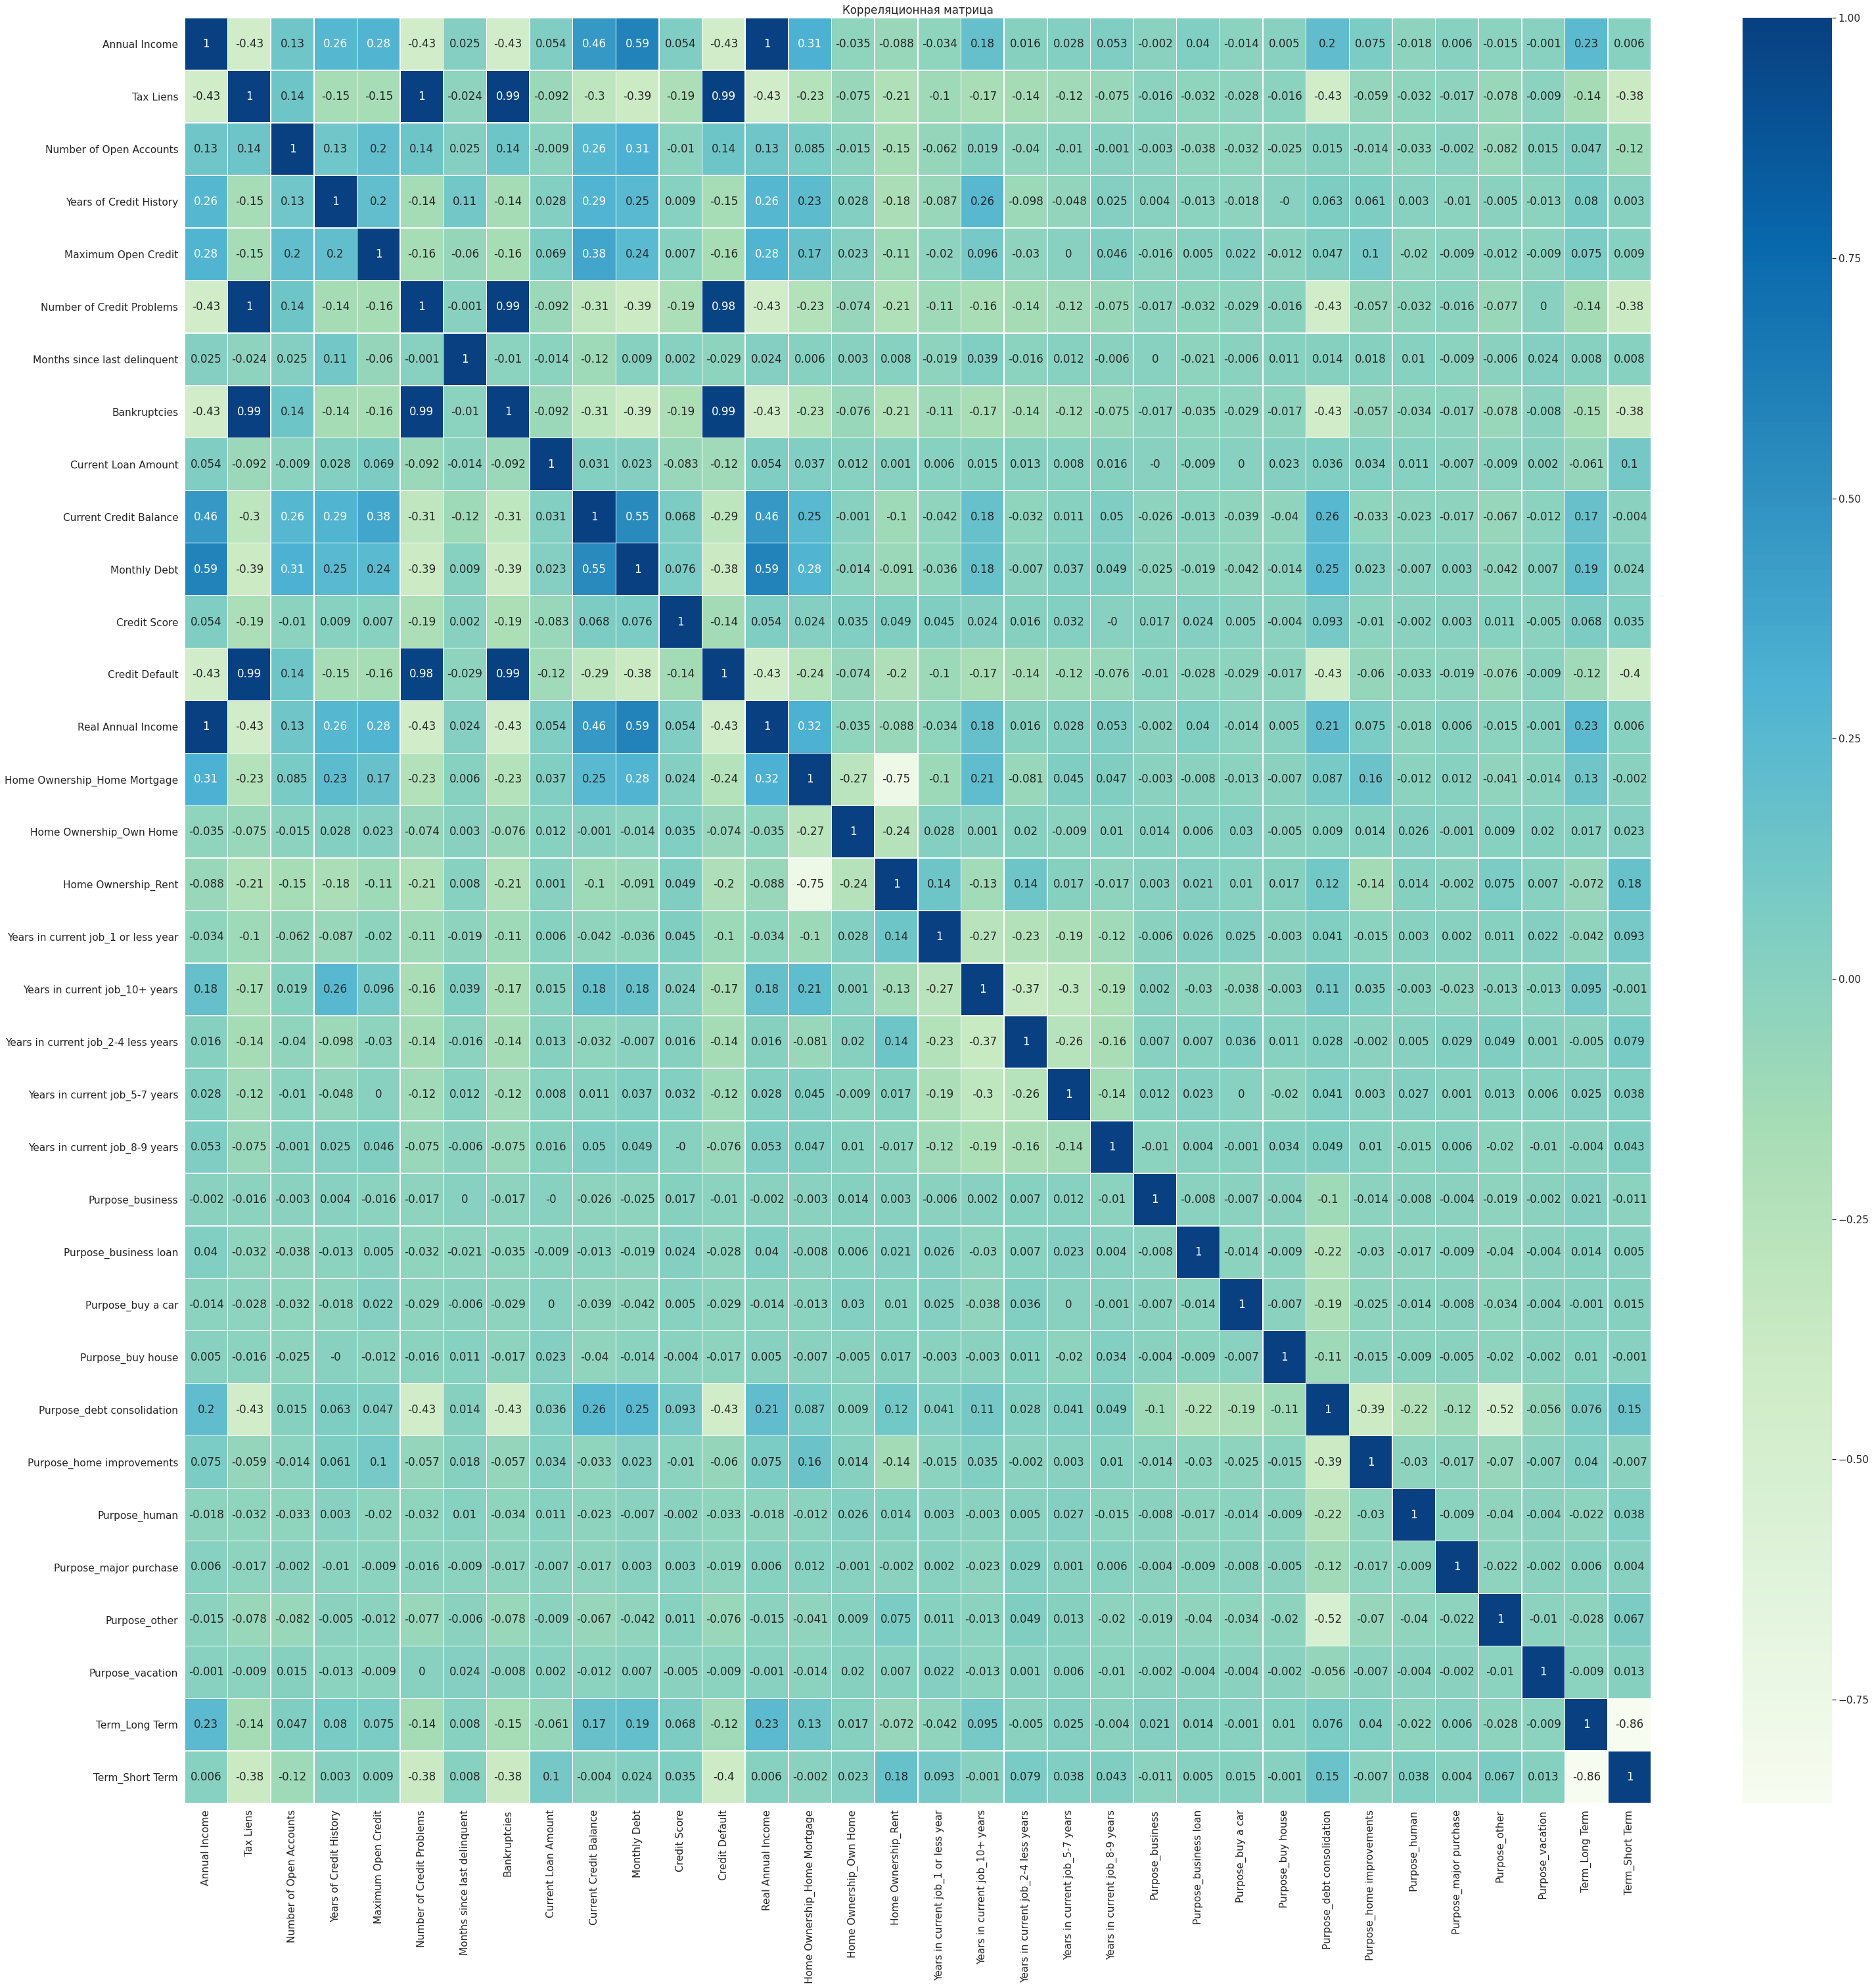

In [54]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize = (50,50))

sns.set(font_scale=1.4)
sns.heatmap(train.corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Корреляционная матрица')
plt.show()

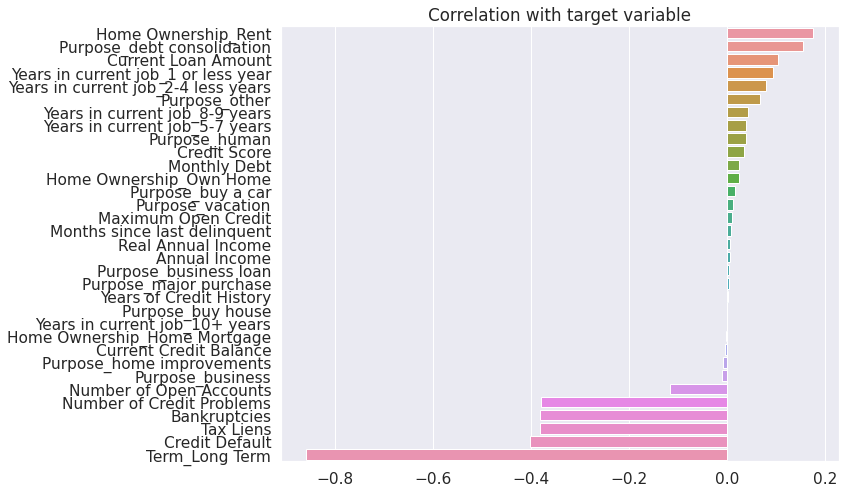

In [55]:
corr_with_target = train.corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Кореляция с целевой переменной')
plt.show()

#### Обучение модели

In [56]:
X = train.drop(columns='Credit Default')
y = train['Credit Default']

In [70]:
y.value_counts()

0    5046
1    2454
Name: Credit Default, dtype: int64

In [69]:
y.loc[y == 14] = 1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=2)

In [72]:
tree = DecisionTreeClassifier(random_state=1)

param_grid = [{'max_depth':range(1,15),
              'min_samples_leaf':range(1,10),
              }]

grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)
tree = grid_search.best_estimator_

In [73]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 1}

In [74]:
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

pred_proba_test = tree.predict_proba(X_test)
pred_proba_test[:5]

array([[0.81023018, 0.18976982],
       [0.71957237, 0.28042763],
       [0.62878788, 0.37121212],
       [0.81023018, 0.18976982],
       [0.81023018, 0.18976982]])

#### Метрики

In [75]:
accurasy_train = accuracy_score(y_train, pred_train)
accurasy_test = accuracy_score(y_test, pred_test)

print(f'Точность на обучающей выборке: {accurasy_train}')
print(f'Точность на проверочной выборке: {accurasy_test}')

Точность на обучающей выборке: 0.7904
Точность на проверочной выборке: 0.7909333333333334


In [76]:
print(confusion_matrix(y_test, pred_test))

[[1236   29]
 [ 363  247]]


In [78]:
print(pn.crosstab(y_test,pred_test))

col_0              0    1
Credit Default           
0               1236   29
1                363  247


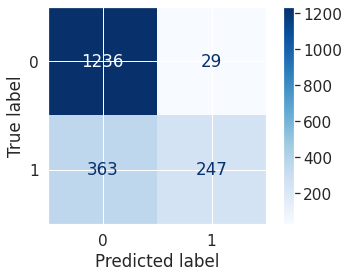

In [80]:
plot_confusion_matrix(tree, X_test, y_test, cmap=plt.cm.Blues, values_format='d');

In [81]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86      1265
           1       0.89      0.40      0.56       610

    accuracy                           0.79      1875
   macro avg       0.83      0.69      0.71      1875
weighted avg       0.81      0.79      0.76      1875



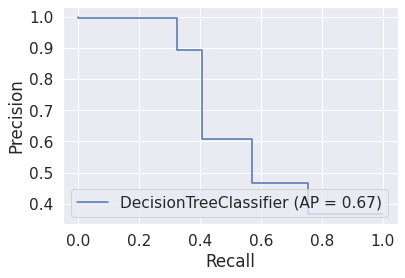

In [82]:
plot_precision_recall_curve(tree, X_test, y_test)

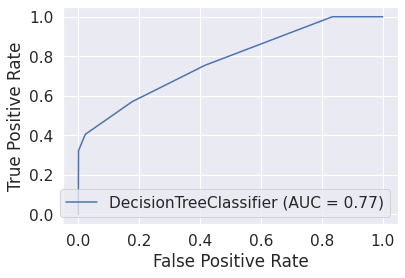

In [83]:
plot_roc_curve(tree, X_test, y_test)

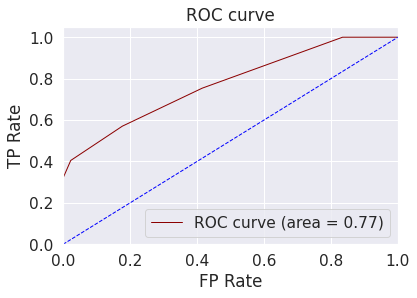

In [84]:
fpr, tpr, thresholds = roc_curve(y_test, pred_proba_test[:,1])

roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color = 'darkred',
        lw=1, label='ROC curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=1,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

In [94]:
print(f1_score(y_test, pred_test, average="macro"))
print(recall_score(y_test, pred_test, average='macro'))

0.7103452841847737
0.6909965658005572


#### Расчет по модели

In [86]:
tree = DecisionTreeClassifier(random_state=1, max_depth=5, min_samples_leaf=1)
tree.fit(X, y)

result = tree.predict(test)


In [87]:
result

array([0, 0, 1, ..., 0, 0, 1])

In [88]:
len(result)

2500

In [97]:
pn.DataFrame({'Price': result}).to_csv('//content/gdrive/My Drive/data/MihailovAP_prediction.csv', index=None)